In [737]:
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt

In [738]:
df = pd.read_csv('data.csv')
df.drop(columns=['ID'], inplace=True)
df.reset_index(drop=True)
df.sample(5)

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
1307,63.000000,female,26.980000,0,yes,northwest,Married,Self-Employed,Moderately Active,6.7,Poor,142272.120000,28950.469200
1381,49.000000,male,37.510000,2,-,southeast,Engaged,Hospitality,Moderately Active,5.6,Poor,30098.110000,9304.701900
633,29.000000,female,25.900000,0,no,southwest,Single,Retail,Lightly Active,6.9,Poor,11040.420000,3353.284000
338,27.000000,male,33.660000,0,no,southeast,Engaged,Construction,Very Active,8.3,Good,13027.610000,2498.414400
916,52.422022,male,38.463725,0,no,northwest,Single,Retail,NaN,9.6,Poor,87424.857435,33328.205594


In [739]:
df.describe()

,age,bmi,children,stress_level,income (USD),charges (USD)
count,3098.000000,3067.000000,3098.000000,3098.000000,3098.000000,3075.000000
mean,39.093165,32.163444,1.118786,6.414526,62360.722112,13476.771230
std,14.133351,99.325991,1.207859,1.721550,64646.475643,12080.919557
min,-8.000000,-989.915959,-3.000000,0.000000,-126055.018185,1000.000000
25%,27.000000,26.315000,0.000000,5.200000,20236.880000,4718.863800
50%,39.000000,30.495000,1.000000,6.400000,41783.988014,9644.252500
75%,51.000000,34.800000,2.000000,7.600000,83888.017500,17807.613070
max,88.336729,5424.864393,5.000000,10.000000,528054.020000,63770.428010


In [740]:
print(f'smoker: {df.smoker.unique()}')
print(f'gender: {df.gender.unique()}')
print(f'region: {df.region.unique()}')
print(f'status: {df.status.unique()}')
print(f'work sector: {df.work_sector.unique()}')
print(f'sleep quality: {df.sleep_quality.unique()}')
print(f'physical activity: {df.physical_activity.unique()}')

smoker: ['no' 'yes' '-' 'DFH']
gender: ['female' 'male']
region: ['southwest' 'northwest' 'southeast' 'northeast']
status: ['Single' 'Engaged' 'Married' 'Single-Parent' 'CDE' 'ABC' nan]
work sector: ['Education' 'IT Support' 'Transportation' 'Hospitality' 'Unemployed'
 'Healthcare Support' 'Retail' 'Entrepreneur' 'Finance' 'Construction'
 'Retail Management' 'Healthcare' 'Law' 'Management' 'Self-Employed' 'IT'
 nan 'Engineering' 'Wizardry' 'Interdimensional Trade']
sleep quality: ['Fair' 'Poor' 'Good' 'Excellent' 'CDE']
physical activity: ['Lightly Active' 'Sedentary' 'Very Active' 'Moderately Active' nan
 'video-gamer']


In [741]:
mask = (df['status'] == 'ABC') | (df['status'] == 'CDE') | (df['sleep_quality'] == 'CDE') | (
        df['physical_activity'] == 'video-gamer')
df[mask]
# drop those 3 as they make no sense and ~0.1% of dataset
# all of them have 2 'corrupted' features

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
36,32.027049,male,32.316381,-3,no,southeast,Married,Construction,Moderately Active,5.3,CDE,9390.753386,10412.900531
573,22.632769,male,-989.915959,0,no,northwest,CDE,Healthcare Support,Lightly Active,2.0,Excellent,98023.266602,22486.448061
639,44.676202,male,27.186491,0,yes,southeast,ABC,Wizardry,video-gamer,4.9,Good,85887.492717,14737.870783


also 'Wizardry' and 'Interdimensional Trade' are strange, I'll drop them to nan and use as Unknown

In [742]:
df.work_sector = df.work_sector.replace(['Wizardry', 'Interdimensional Trade'], np.nan)

In [743]:
df = df[~mask]
df.reset_index(drop=True)

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
0,45.0,female,25.700,3,no,southwest,Single,Education,Lightly Active,6.9,Fair,44324.35,9101.79800
1,32.0,male,28.120,4,yes,northwest,Engaged,IT Support,Sedentary,6.9,Poor,102553.91,21472.47880
2,41.0,female,37.100,2,-,southwest,Single,Transportation,Very Active,5.9,Fair,18429.43,7371.77200
3,26.0,male,31.065,0,no,northwest,Single,Education,Sedentary,5.9,Fair,14888.09,2699.56835
4,23.0,female,34.960,3,no,northwest,Married,Hospitality,Sedentary,8.6,Good,15571.19,4466.62140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,54.0,male,34.210,2,yes,southeast,Married,Finance,Lightly Active,9.2,Poor,336130.93,44260.74990
3091,18.0,female,31.350,4,no,northeast,Single,Retail,Sedentary,10.0,Poor,21624.45,4561.18850
3092,39.0,female,23.870,5,no,southeast,Single,Transportation,Lightly Active,5.8,Good,36357.70,8582.30230
3093,58.0,male,25.175,0,no,northeast,Single,Education,Lightly Active,4.7,Poor,69475.40,11931.12525


let's encode features:
- gender to boolean 'is_male'
- smoker oneHot (smoking, not smoking, unknown)
- region oneHot
- status oneHot (later after imputation)
- work_sector oneHot (later after imputation)
- sleep_quality numerical (as it's ordinal Poor -> Excellent)
- physical_activity numerical (as it's ordinal Sedentary -> Very Active)

In [744]:
print(f'{(df.children < 0).sum()} negative children rows')
df[(df.age < 18)]

1 negative children rows


,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
87,15.123557,female,30.360872,0,no,southeast,Single,Retail,Lightly Active,6.3,Poor,87861.868595,12864.070934
229,15.727649,female,41.854735,3,no,southeast,Married,IT,Moderately Active,4.5,Poor,140960.706083,46680.037223
306,15.168302,female,33.939556,0,yes,southwest,Engaged,Retail Management,Moderately Active,6.7,Fair,111189.507135,2495.923471
450,6.190668,female,22.324037,1,no,southeast,Married,Hospitality,Sedentary,1.8,Excellent,865.951745,5679.525258
454,13.329776,male,31.931234,3,yes,northwest,Single,Healthcare,Sedentary,7.3,Poor,86474.198292,29890.117369
482,2.374126,female,26.686038,1,no,northwest,Single,Finance,Moderately Active,6.5,Fair,101398.371162,27999.218508
695,2.879041,female,28.338212,2,yes,southwest,Single,Finance,Lightly Active,9.1,Poor,148958.692649,37556.610697
789,15.834161,male,38.075766,1,no,northwest,Single,Healthcare,Lightly Active,8.1,Poor,7890.258501,17332.663693
871,12.526339,female,26.256683,2,no,northwest,Married,Management,Moderately Active,4.3,Fair,143381.792011,3256.099146
882,10.592705,male,31.844211,0,yes,northeast,Married,Hospitality,Lightly Active,6.2,Poor,20342.800913,23619.942885


only one with negative children, let's just set it to 0

those values of age make no sense (married or with children at <18...)

let's drop those with nan, and later impute them

In [745]:
df['smoker'] = df['smoker'].str.strip().str.lower()
df['smoking'] = df['smoker'].eq('yes').astype('float')
df['not_smoking'] = df['smoker'].eq('no').astype('float')
df = df.drop(columns=['smoker'])
df.children = df.children.apply(lambda x: max(x, 0)).astype(float)
df['is_male'] = df.gender.apply(lambda x: 1 if x == 'male' else 0).astype(float)
df.drop(columns=['gender'], inplace=True)
df = pd.get_dummies(df, columns=['region'], drop_first=True, dtype=float)
df.sleep_quality = df.sleep_quality.apply(lambda x:
                                          {
                                              'Poor': 0,
                                              'Fair': 1,
                                              'Good': 2,
                                              'Excellent': 3
                                          }[x]).astype(float)
df.physical_activity = df.physical_activity.apply(lambda x:
                                                  {
                                                      'Sedentary': 0,
                                                      'Lightly Active': 1,
                                                      'Moderately Active': 2,
                                                      'Very Active': 3
                                                  }.get(x, np.nan)).astype(float)
df.age = df.age.where(df.age >= 18)
df.sample(10)

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest
441,59.000000,31.350000,0.0,Single,Transportation,3.0,6.7,0.0,63792.500000,12622.179500,0.0,1.0,0.0,1.0,0.0,0.0
1006,63.000000,36.850000,0.0,Married,Transportation,2.0,5.4,0.0,86445.110000,13887.968500,0.0,1.0,0.0,0.0,1.0,0.0
830,46.047413,31.246092,1.0,Single,Construction,2.0,7.2,0.0,-30259.996456,3003.613228,0.0,0.0,0.0,0.0,0.0,0.0
2653,19.000000,28.700000,0.0,Single,Hospitality,2.0,9.0,0.0,11973.650000,1253.936000,0.0,1.0,1.0,0.0,0.0,1.0
2788,46.000000,34.600000,1.0,Married,Management,1.0,10.0,0.0,198403.160000,41661.602000,1.0,0.0,0.0,0.0,0.0,1.0
6,52.000000,44.700000,3.0,Single,Healthcare Support,2.0,8.0,2.0,58346.850000,11411.685000,0.0,1.0,0.0,0.0,0.0,1.0
762,52.000000,26.400000,3.0,Single-Parent,Retail Management,0.0,7.8,0.0,106180.430000,25992.821040,0.0,1.0,1.0,0.0,1.0,0.0
1625,45.158542,33.357782,3.0,Married,Hospitality,0.0,5.5,0.0,-76658.483893,9268.305512,0.0,1.0,1.0,0.0,1.0,0.0
3004,27.000000,26.030000,0.0,Married,Education,2.0,2.7,2.0,29427.430000,3070.808700,0.0,0.0,1.0,0.0,0.0,0.0
1305,24.000000,28.500000,0.0,Married,Management,NaN,7.8,0.0,230589.380000,35147.528480,1.0,0.0,1.0,0.0,0.0,0.0


In [746]:
row_misses = df.isna().mean(axis=1) * 100
(row_misses > 30).sum()  # all rows good

0

now let's check outliers

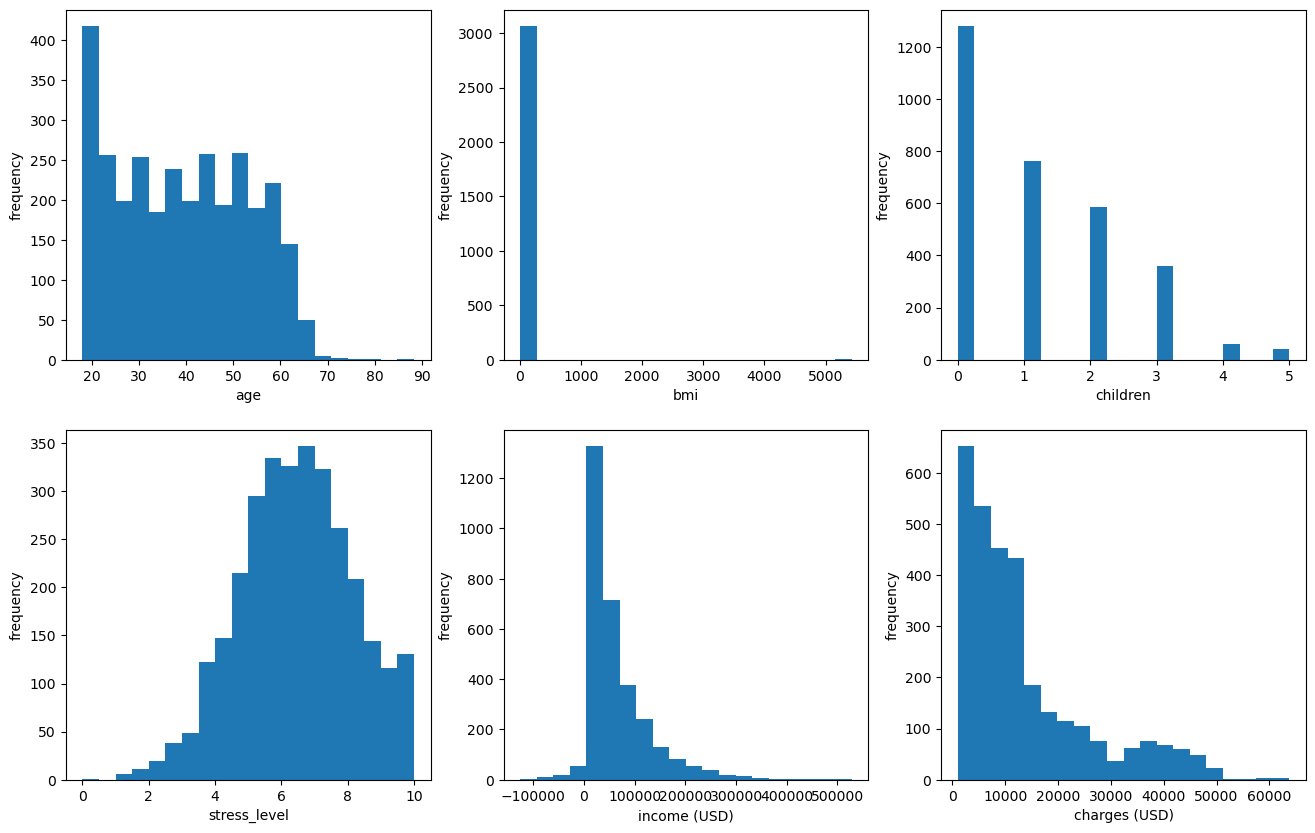

In [747]:
cols = ['age', 'bmi', 'children', 'stress_level', 'income (USD)', 'charges (USD)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i in range(2):
    for j in range(3):
        col = cols[i * 3 + j]
        axes[i][j].hist(df[col], bins=20)
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel("frequency")

- bmi clearly have outliers
- income is super skewed, let's drop negative vals (for later imputation) and do log transform
- charges skewed too, same log there
- age is uniform, so let's bin it
- also we have negative income... I'll make a flag for those values (negative_income_flag), this flag would allow us to treat those values better OR it'll be reduced on feature selection phase (Lasso in future)

In [748]:
(df['income (USD)'] <= 0).sum()

54

In [749]:
q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df.bmi = df.bmi.mask((df.bmi < lower) | (df.bmi > upper))

mask = (df['income (USD)'] < 0)
df['negative_income_flag'] = mask.astype(float)

df['income (USD)'] = np.log1p(df['income (USD)'].apply(lambda x: max(x, 0)))
df['charges (USD)'] = np.log1p(df['charges (USD)'].apply(lambda x: max(x, 0)))

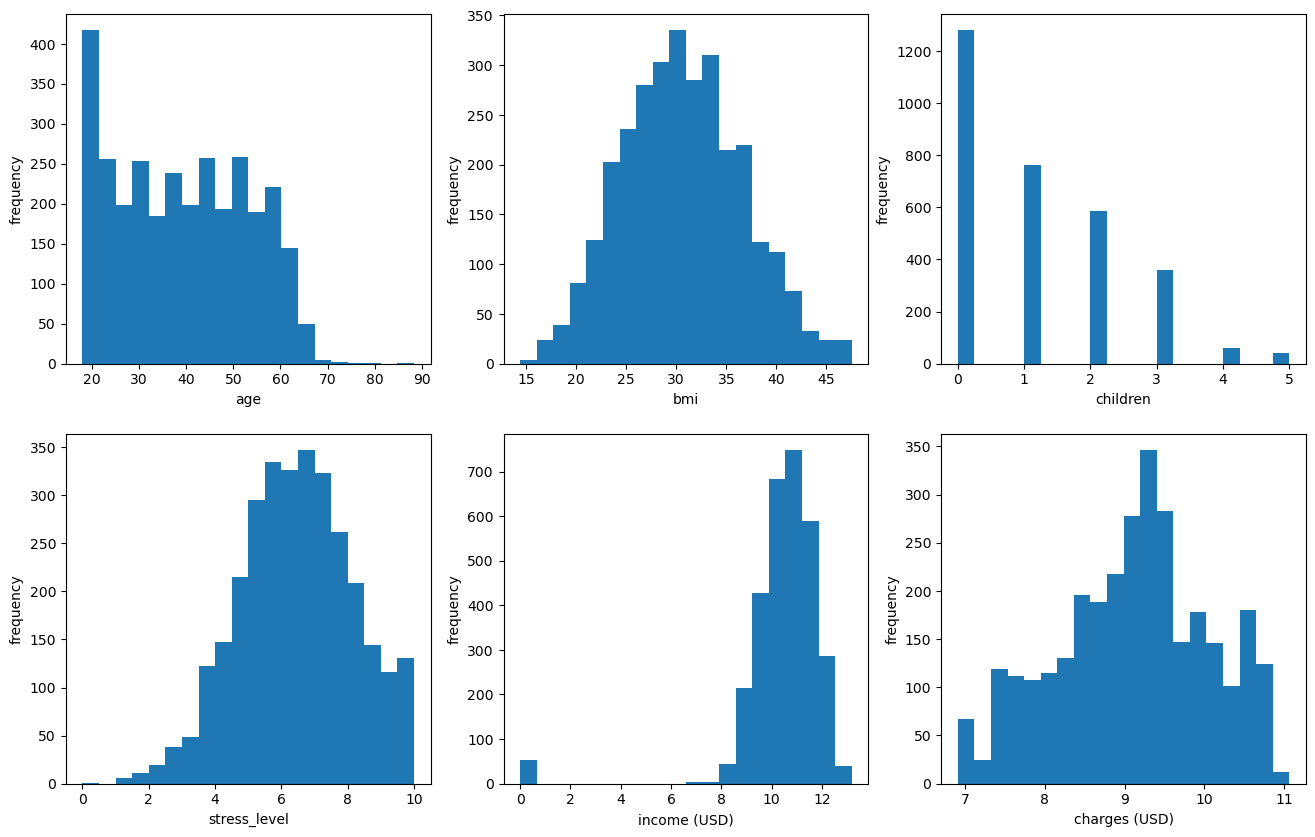

In [750]:
cols = ['age', 'bmi', 'children', 'stress_level', 'income (USD)', 'charges (USD)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i in range(2):
    for j in range(3):
        col = cols[i * 3 + j]
        axes[i][j].hist(df[col], bins=20)
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel("frequency")

binning:

let's bin to <25, 25-35, 35-45 ... >65

In [751]:
cut = [15, 25, 35, 45, 55, 65, 100]
labels = ['15-25', '25-35', '35-45', '45-55', '55-65', '65+']
df.age = pd.cut(df.age, bins=cut, labels=labels)
df

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest,negative_income_flag
0,35-45,25.700,3.0,Single,Education,1.0,6.9,1.0,10.699312,9.116337,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,25-35,28.120,4.0,Engaged,IT Support,0.0,6.9,0.0,11.538154,9.974574,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,35-45,37.100,2.0,Single,Transportation,3.0,5.9,1.0,9.821758,8.905549,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25-35,31.065,0.0,Single,Education,0.0,5.9,1.0,9.608384,7.901218,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,15-25,34.960,3.0,Married,Hospitality,0.0,8.6,2.0,9.653242,8.404611,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,45-55,34.210,2.0,Married,Finance,1.0,9.2,0.0,12.725259,10.697876,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3094,15-25,31.350,4.0,Single,Retail,0.0,10.0,0.0,9.981626,8.425558,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3095,35-45,23.870,5.0,Single,Transportation,1.0,5.8,2.0,10.501189,9.057574,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3096,55-65,25.175,0.0,Single,Education,1.0,4.7,0.0,11.148742,9.386990,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### Imputation time

In [752]:
df.isna().sum()

age                     23
bmi                     48
children                 0
status                   1
work_sector             39
physical_activity       79
stress_level             0
sleep_quality            0
income (USD)             0
charges (USD)           23
smoking                  0
not_smoking              0
is_male                  0
region_northwest         0
region_southeast         0
region_southwest         0
negative_income_flag     0
dtype: int64

let's drop all rows for charges (as it's target feature)

In [753]:
df = df[~df['charges (USD)'].isna()]

work sector: is something not imputable (as it's a job I will make Missing values 'Unknown')

In [754]:
df.loc[:, 'work_sector'] = df['work_sector'].fillna('Unknown')

age: we are missing only 23 vals, so let's fill with mode

In [755]:
df.loc[:, 'age'] = df['age'].fillna(df['age'].mode()[0])

physical activity: we are missing only 79 vals, fill with mode

In [756]:
df.loc[:, 'physical_activity'] = df['physical_activity'].fillna(df['physical_activity'].mode()[0])

status: same

In [757]:
df.loc[:, 'status'] = df['status'].fillna(df['status'].mode()[0])

now we can do imputation:
- split
- scale
- kNN impute

In [758]:
y = df.pop('charges (USD)')
X = df

In [759]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

Now we gonna scale + impute

In [760]:
cols = ['bmi', 'stress_level', 'income (USD)']
robust_scaler = sk.preprocessing.RobustScaler()
X_train[cols] = robust_scaler.fit_transform(X_train[cols])
X_test[cols] = robust_scaler.transform(X_test[cols])

for kNN imputation I'll use Jensen–Shannon divergence formula, to keep distribution alike

In [761]:
def jsd(x, y, bins=30, eps=1e-12):
    hx,e = np.histogram(np.asarray(x,float)[~np.isnan(x)], bins=bins, density=True)
    hy,_ = np.histogram(np.asarray(y,float)[~np.isnan(y)], bins=e,    density=True)
    hx = (hx+eps)
    hy = (hy+eps)
    hx /= hx.sum()
    hy /= hy.sum()
    m = 0.5*(hx+hy)
    js = 0.5*np.sum(hx*(np.log(hx)-np.log(m))) + 0.5*np.sum(hy*(np.log(hy)-np.log(m)))
    return float(js/(np.log2(len(hx)) if len(hx)>1 else 1.0))

In [762]:
def try_knn(n):
    X_train_copy = X_train.copy()
    kNN_imputer = sk.impute.KNNImputer(n_neighbors=n)
    X_train_copy[cols] = kNN_imputer.fit_transform(X_train_copy[cols])
    avg_loss = 0
    for col in cols:
        avg_loss += jsd(X_train[col], X_train_copy[col])
    avg_loss /= len(cols)
    return avg_loss

In [763]:
best_n = -1
best_loss = float('inf')
for n in range(1, 101):
    avg_loss = try_knn(n)
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_n = n
print(f'Best N: {best_n} with loss: {best_loss}')

Best N: 4 with loss: 1.0831788162622758e-06


In [764]:
kNN_imputer = sk.impute.KNNImputer(n_neighbors=best_n)
X_train[cols] = kNN_imputer.fit_transform(X_train[cols])
X_test[cols] = kNN_imputer.transform(X_test[cols])

In [765]:
X_train

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest,negative_income_flag
368,55-65,-1.135788,0.0,Married,Education,1.0,-0.625000,1.0,-0.145943,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3097,35-45,0.581322,2.0,Married,Management,0.0,1.416667,0.0,1.095254,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2352,15-25,-0.642728,0.0,Single,Education,1.0,-0.416667,2.0,-0.953818,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2311,45-55,-0.963790,0.0,Engaged,Healthcare Support,2.0,-0.583333,1.0,-0.449531,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1576,55-65,-0.264333,0.0,Single,Healthcare Support,2.0,0.875000,1.0,-0.159073,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,25-35,-0.528063,0.0,Single,Construction,3.0,-0.041667,2.0,0.166184,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1103,55-65,-0.663240,2.0,Married,Education,1.0,0.500000,0.0,-0.829126,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1138,15-25,0.171394,0.0,Single,Education,2.0,-0.416667,0.0,-1.415067,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,15-25,-0.241400,0.0,Married,Management,1.0,0.583333,0.0,1.209586,1.0,0.0,1.0,0.0,0.0,0.0,0.0


One final step: oneHot and we are done with data preprocessing

N.B. I'll use embedded feature selection technique (Lasso)

In [766]:
cat_cols = ['status', 'work_sector', 'age']

encoder = sk.preprocessing.OneHotEncoder(handle_unknown='ignore', sparse_output=False)

Xtr_cat = encoder.fit_transform(X_train[cat_cols])
Xte_cat = encoder.transform(X_test[cat_cols])

cat_names = encoder.get_feature_names_out(cat_cols)
Xtr_cat = pd.DataFrame(Xtr_cat, index=X_train.index, columns=cat_names)
Xte_cat = pd.DataFrame(Xte_cat, index=X_test.index,  columns=cat_names)

num_cols = [c for c in X_train.columns if c not in cat_cols]
X_train = pd.concat([X_train[num_cols].reset_index(drop=True), Xtr_cat.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test[num_cols].reset_index(drop=True),  Xte_cat.reset_index(drop=True)],  axis=1)

In [767]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bmi                             2457 non-null   float64
 1   children                        2457 non-null   float64
 2   physical_activity               2457 non-null   float64
 3   stress_level                    2457 non-null   float64
 4   sleep_quality                   2457 non-null   float64
 5   income (USD)                    2457 non-null   float64
 6   smoking                         2457 non-null   float64
 7   not_smoking                     2457 non-null   float64
 8   is_male                         2457 non-null   float64
 9   region_northwest                2457 non-null   float64
 10  region_southeast                2457 non-null   float64
 11  region_southwest                2457 non-null   float64
 12  negative_income_flag            24

In [768]:
X_train.isna().sum()

bmi                               0
children                          0
physical_activity                 0
stress_level                      0
sleep_quality                     0
income (USD)                      0
smoking                           0
not_smoking                       0
is_male                           0
region_northwest                  0
region_southeast                  0
region_southwest                  0
negative_income_flag              0
status_Engaged                    0
status_Married                    0
status_Single                     0
status_Single-Parent              0
work_sector_Construction          0
work_sector_Education             0
work_sector_Engineering           0
work_sector_Entrepreneur          0
work_sector_Finance               0
work_sector_Healthcare            0
work_sector_Healthcare Support    0
work_sector_Hospitality           0
work_sector_IT                    0
work_sector_IT Support            0
work_sector_Law             

In [769]:
X_test.isna().sum()

bmi                               0
children                          0
physical_activity                 0
stress_level                      0
sleep_quality                     0
income (USD)                      0
smoking                           0
not_smoking                       0
is_male                           0
region_northwest                  0
region_southeast                  0
region_southwest                  0
negative_income_flag              0
status_Engaged                    0
status_Married                    0
status_Single                     0
status_Single-Parent              0
work_sector_Construction          0
work_sector_Education             0
work_sector_Engineering           0
work_sector_Entrepreneur          0
work_sector_Finance               0
work_sector_Healthcare            0
work_sector_Healthcare Support    0
work_sector_Hospitality           0
work_sector_IT                    0
work_sector_IT Support            0
work_sector_Law             

Linear Regression time

In [770]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bmi                             2457 non-null   float64
 1   children                        2457 non-null   float64
 2   physical_activity               2457 non-null   float64
 3   stress_level                    2457 non-null   float64
 4   sleep_quality                   2457 non-null   float64
 5   income (USD)                    2457 non-null   float64
 6   smoking                         2457 non-null   float64
 7   not_smoking                     2457 non-null   float64
 8   is_male                         2457 non-null   float64
 9   region_northwest                2457 non-null   float64
 10  region_southeast                2457 non-null   float64
 11  region_southwest                2457 non-null   float64
 12  negative_income_flag            24

In [771]:
import seaborn as sns

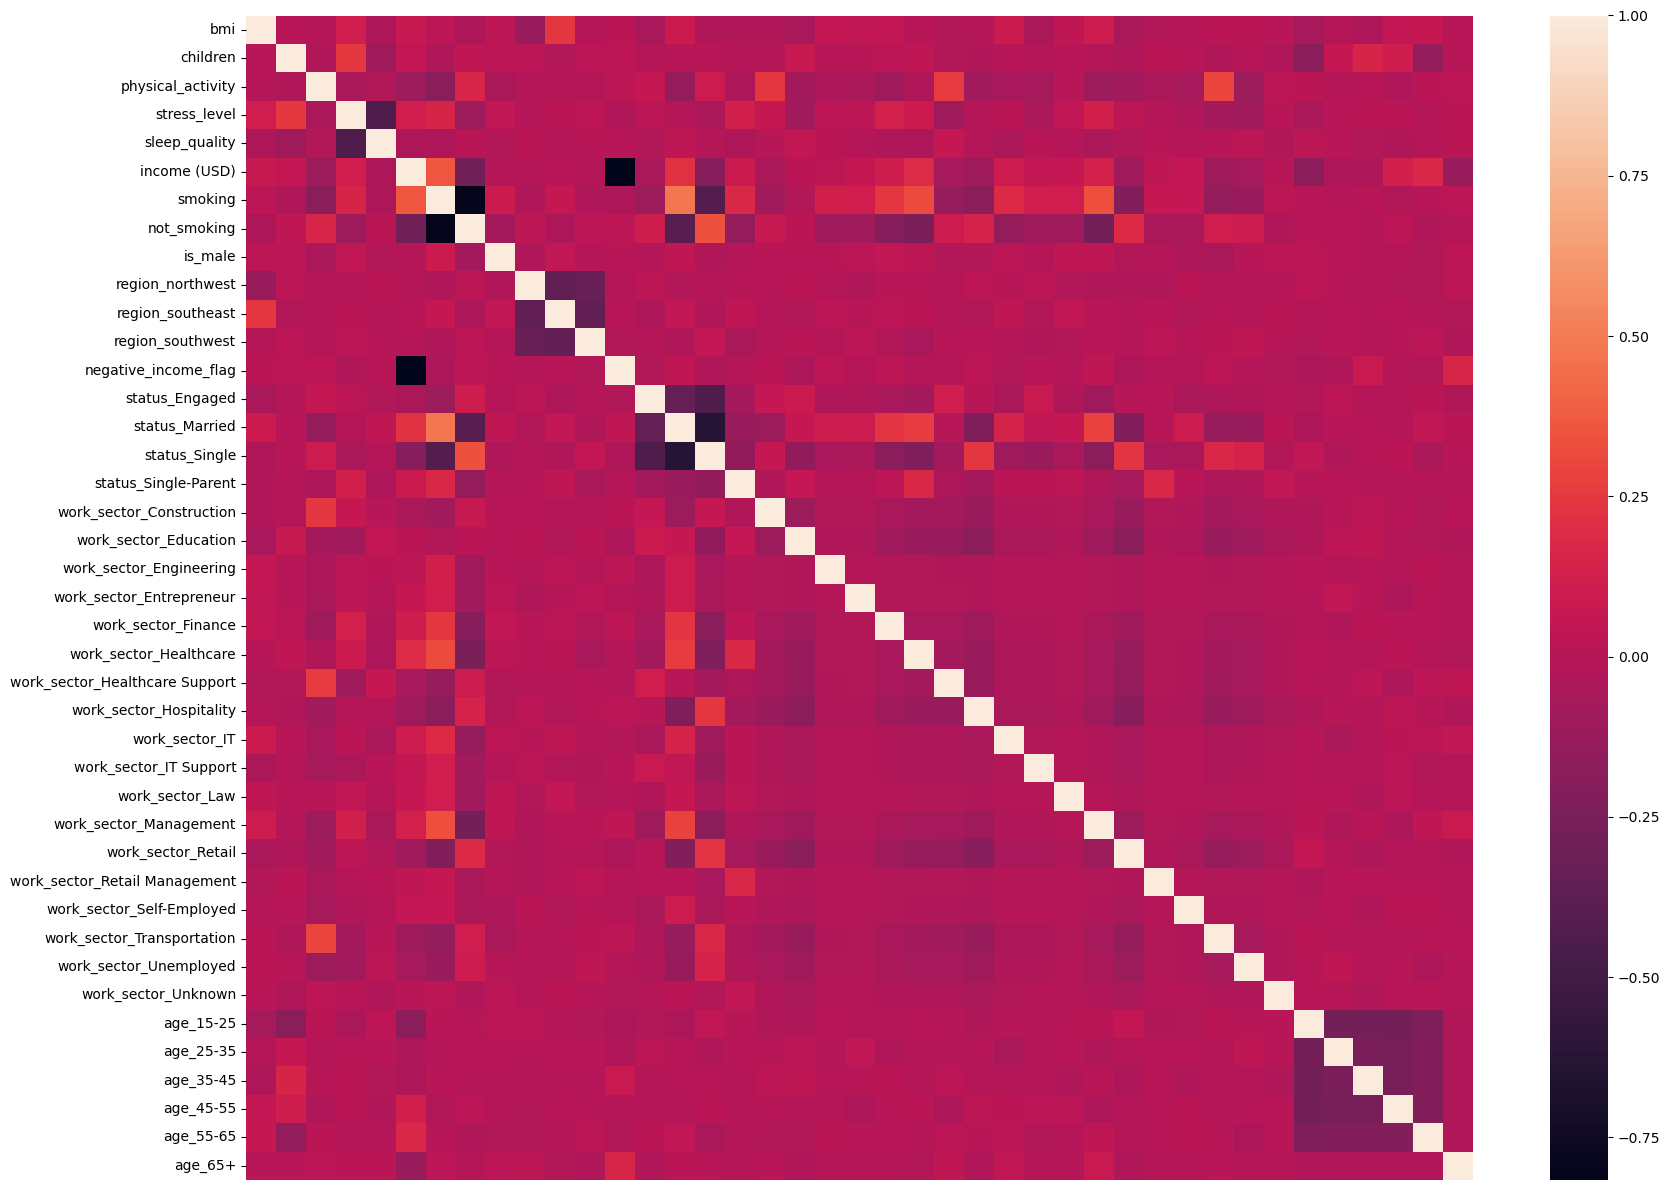

In [775]:
plt.figure(figsize=(18, 12))
ax = sns.heatmap(X_train.corr(),)
ax.tick_params( bottom=False, labelbottom=False)
plt.tight_layout(); plt.show()